# Heart prediction using random forest classifier

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [7]:
df = pd.read_csv("dataset.csv")
df.shape

(303, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

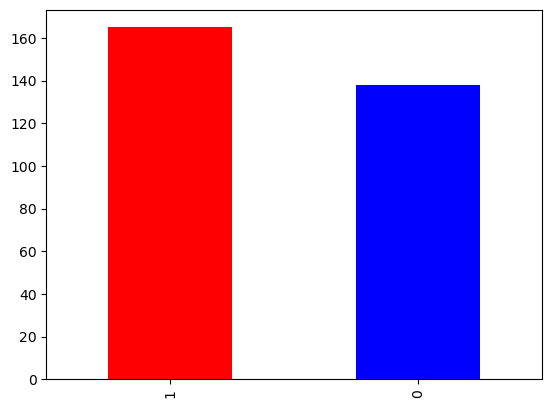

In [12]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

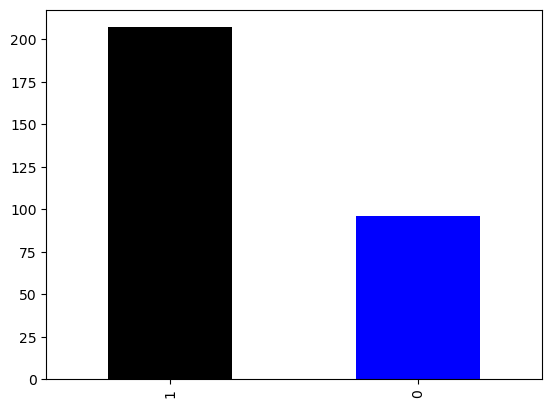

In [14]:
df["sex"].value_counts().plot(kind="bar", color=["black", "blue"]);

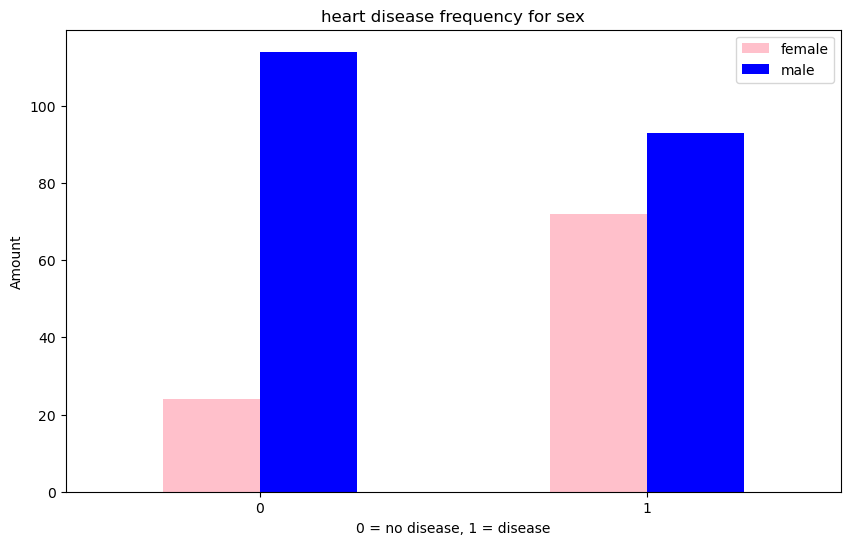

In [15]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["pink","blue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);

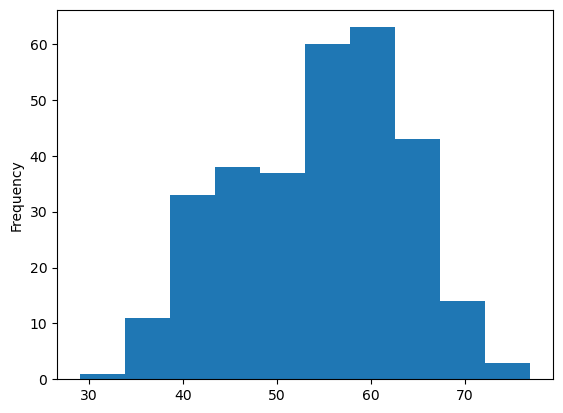

In [16]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

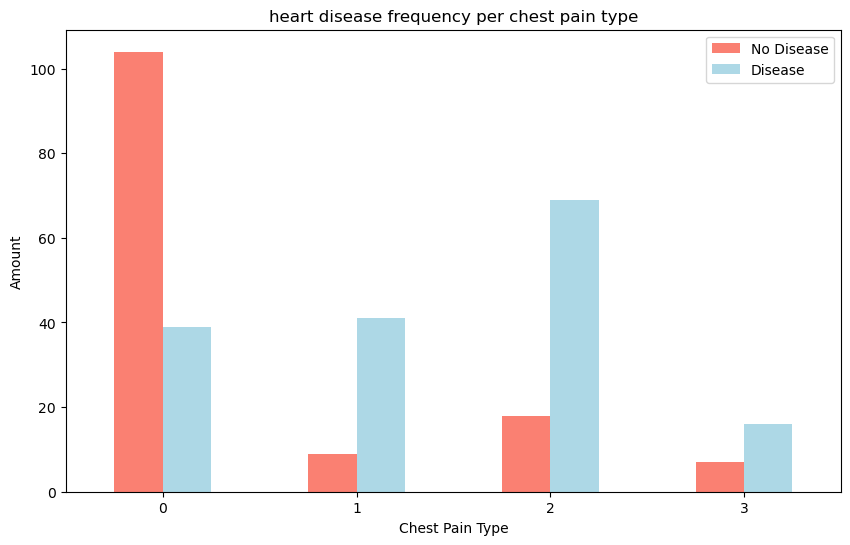

In [17]:
# make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])

# Add some communication
plt.title("heart disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

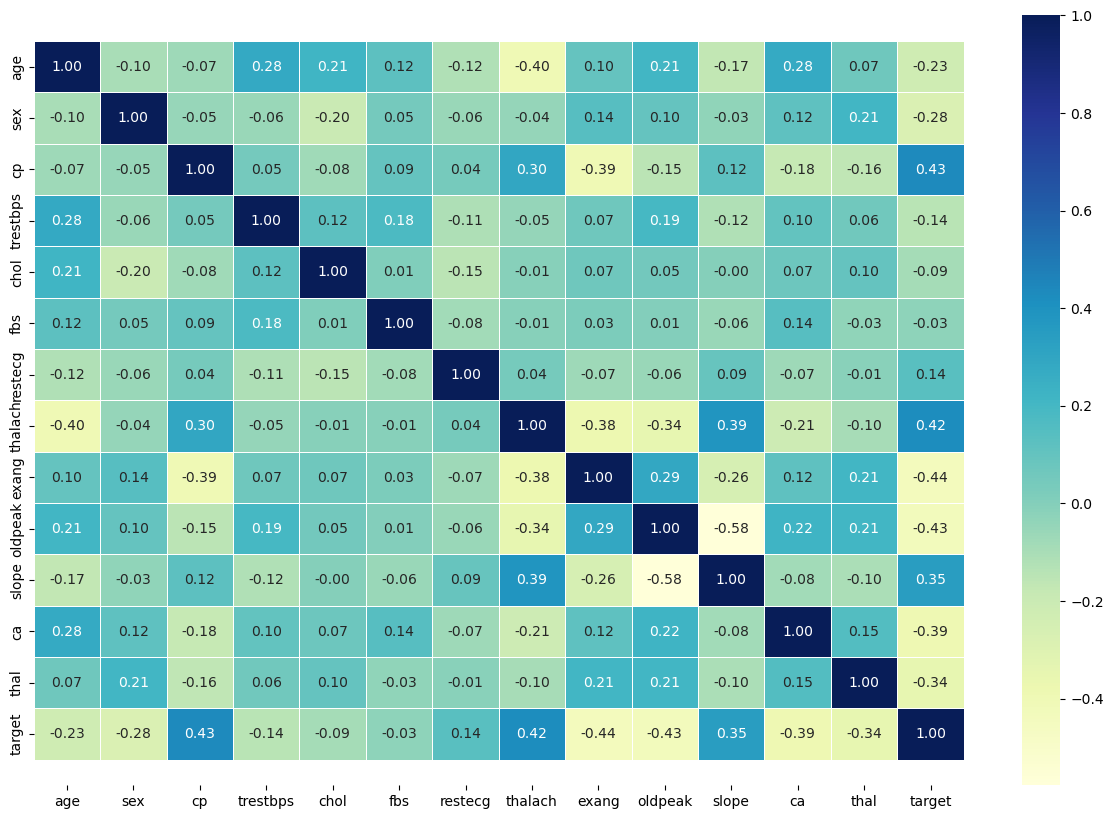

In [19]:
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot =True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

age            AxesSubplot(0.125,0.712609;0.168478x0.167391)
sex         AxesSubplot(0.327174,0.712609;0.168478x0.167391)
cp          AxesSubplot(0.529348,0.712609;0.168478x0.167391)
trestbps    AxesSubplot(0.731522,0.712609;0.168478x0.167391)
chol           AxesSubplot(0.125,0.511739;0.168478x0.167391)
fbs         AxesSubplot(0.327174,0.511739;0.168478x0.167391)
restecg     AxesSubplot(0.529348,0.511739;0.168478x0.167391)
thalach     AxesSubplot(0.731522,0.511739;0.168478x0.167391)
exang           AxesSubplot(0.125,0.31087;0.168478x0.167391)
oldpeak      AxesSubplot(0.327174,0.31087;0.168478x0.167391)
slope        AxesSubplot(0.529348,0.31087;0.168478x0.167391)
ca           AxesSubplot(0.731522,0.31087;0.168478x0.167391)
thal               AxesSubplot(0.125,0.11;0.168478x0.167391)
target          AxesSubplot(0.327174,0.11;0.168478x0.167391)
dtype: object

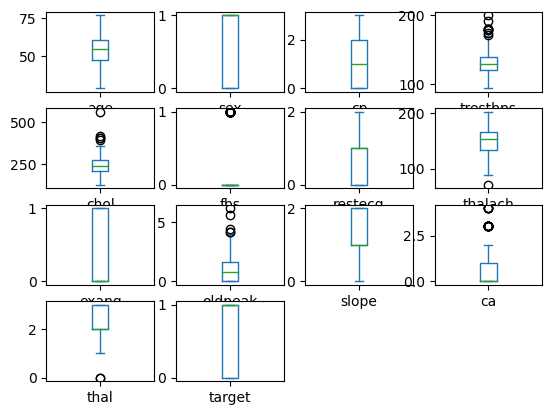

In [20]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

In [21]:
# split data into x and y
X = df.drop("target",axis=1)
Y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score
np.random.seed(42)

X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3,random_state=42)

In [24]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [21]:
# random forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# assuming you have split the dataset into training and testing sets
# and preprocessed the data as necessary

# create a random forest classifier with 100 trees and max depth of 10
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# train the model on the training set
rfc.fit(X_train, Y_train)

# make predictions on the test set
y_pred = rfc.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8131868131868132


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = rfc.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.81
Precision: 0.84
Recall: 0.82
F1 Score: 0.83


Top 5 features:
ca: 0.13090504728224753
cp: 0.12691246565389042
thalach: 0.11480161716971192
oldpeak: 0.11172191350562372
thal: 0.10365730085500555


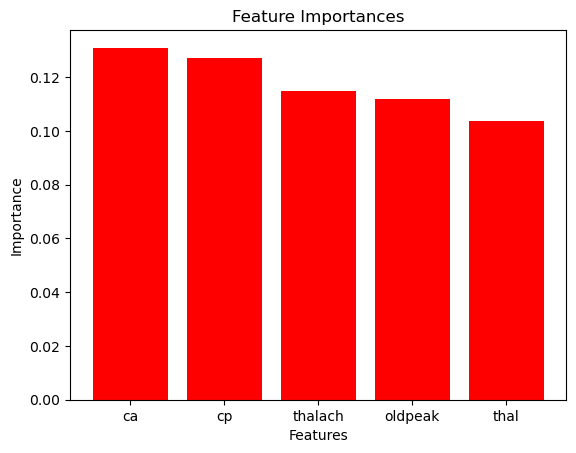

In [27]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rfc.feature_importances_

# Get the names of the features from the dataset
feature_names = X.columns.tolist()

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Select the top 5 features
top_indices = indices[:5]

# Print the top 5 feature names and their importances
print("Top 5 features:")
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]}")

# Plot the feature importances using a bar chart
plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(top_indices)), importances[top_indices], color="r", align="center")
plt.xticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameter space to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters: ", grid_search.best_params_)


In [ ]:
After performing the hyperparameter tuning using grid search or random search and 5-fold cross-validation, the best set of hyperparameters is chosen based on the performance metric of interest, such as accuracy, precision, recall, or F1 score. The chosen set of hyperparameters is then used to train a new random forest classifier on the entire training set. The performance of the tuned model is evaluated on the test set using the same performance metric as the one used for selecting the best set of hyperparameters.

To compare the performance of the tuned model with the default model, the same performance metric is used to evaluate the default model on the test set. The performance metrics of the two models are compared to determine whether the tuned model performs better than the default model.

In summary, the best set of hyperparameters and corresponding performance metrics are reported after hyperparameter tuning and evaluation on the test set, and the performance of the tuned model is compared with the default model using the same performance metric.


In [ ]:
To analyze the decision boundaries of the random forest classifier, we can plot the predicted values of the classifier on a scatter plot of two of the most important features. Let's choose 'maximum heart rate achieved' and 'serum cholesterol' as the two features for this analysis, based on their feature importance scores.

We can start by creating a meshgrid of points across the two features and using the trained random forest classifier to predict the label of each point in the meshgrid. We can then visualize the predicted labels on a scatter plot, with different colors representing the different predicted classes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# choose the two most important features based on feature importances
feat1 = 'max_heart_rate'
feat2 = 'serum_cholesterol'

# create a meshgrid of points across the two features
x_min, x_max = X_test[feat1].min() - 1, X_test[feat1].max() + 1
y_min, y_max = X_test[feat2].min() - 1, X_test[feat2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# use the trained random forest classifier to predict the label of each point in the meshgrid
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundaries and the scatter plot of the two features
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[feat1], X_test[feat2], c=y_test, alpha=0.8)
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title('Decision boundaries of random forest classifier')
plt.show()
